In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. Gráficos de Dispersão (Scatter Plots)

In [6]:
# Precisão de 2 casas decimais:
pd.set_option('float_format', '{:.2f}'.format)

data = pd.read_csv('./data_new_graphics/nitrogen_effluent_matrix.csv', sep=",")
data

,Origem,Nitrogen,Phosphorus,Potassium,Calcium,Sulphur,Sodium,Magnesium
0,1,61.23,5.93,14.20,17.66,2.35,32.02,1.83
1,1,122.15,11.83,28.33,35.22,4.69,63.87,3.65
2,1,182.47,17.67,42.32,52.62,7.01,95.42,5.46
3,1,243.30,23.56,56.43,70.16,9.34,127.23,7.27


In [7]:
data.dtypes

Origem          int64
Nitrogen      float64
Phosphorus    float64
Potassium     float64
Calcium       float64
Sulphur       float64
Sodium        float64
Magnesium     float64
dtype: object

In [8]:
# Lista dos elementos para comparar com Nitrogênio
elements = ['Phosphorus', 'Potassium', 'Calcium', 'Sulphur', 'Sodium', 'Magnesium']

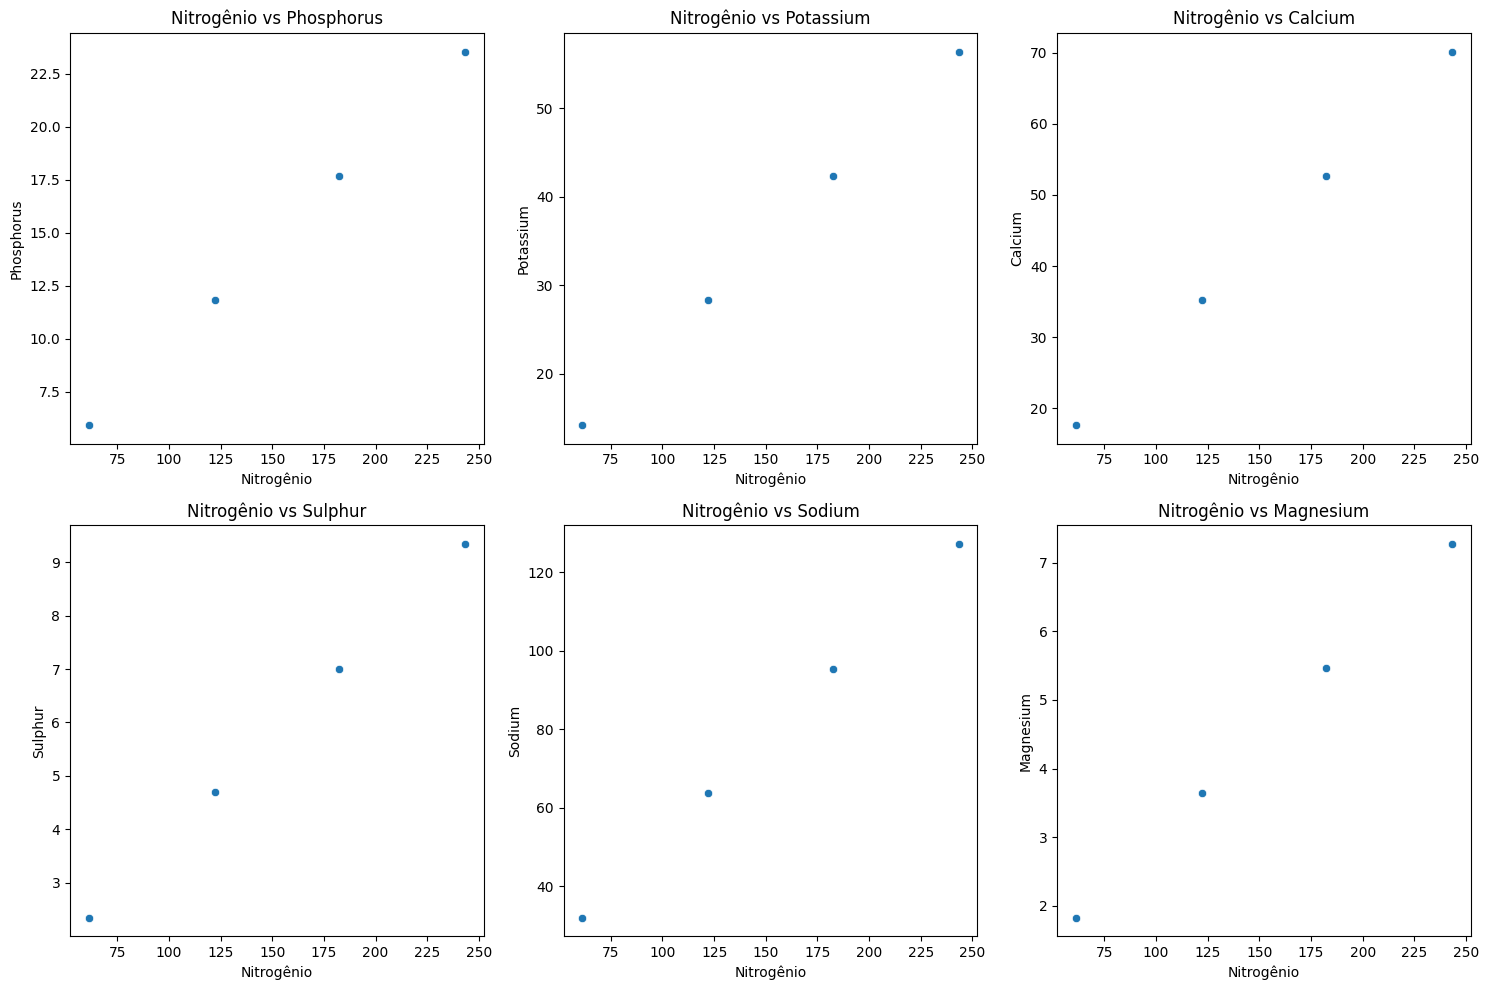

In [9]:
# Definir o tamanho da figura para os subplots
plt.figure(figsize=(15, 10))

# Criar subplots para cada elemento comparado ao Nitrogênio
for i, element in enumerate(elements, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=data['Nitrogen'], y=data[element])
    plt.title(f'Nitrogênio vs {element}')
    plt.xlabel('Nitrogênio')
    plt.ylabel(element)

# Ajustar layout
plt.tight_layout()
plt.show()

# 2. Regressão Linear Simples (Nitrogênio vs. um elemento)

In [11]:
# Definir as variáveis independentes (X) e dependentes (y)
X = data['Nitrogen'].values.reshape(-1, 1)
y = data['Phosphorus'].values

In [12]:
# Criar o modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [13]:
# Exibir o coeficiente e intercepto
print(f"Coeficiente: {model.coef_[0]}")
print(f"Intercepto: {model.intercept_}")

Coeficiente: 0.09682951472152068
Intercepto: 0.001575276846415008


In [16]:
# Prever os valores de y com base no modelo
y_pred = model.predict(X)
y_pred

array([ 5.93044646, 11.8293005 , 17.67005683, 23.56019621])

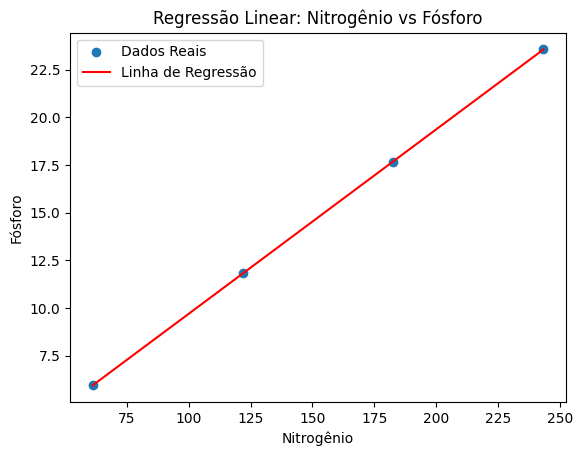

In [15]:
# Gráfico de dispersão com a linha de regressão
plt.scatter(data['Nitrogen'], y, label='Dados Reais')
plt.plot(data['Nitrogen'], y_pred, color='red', label='Linha de Regressão')
plt.title('Regressão Linear: Nitrogênio vs Fósforo')
plt.xlabel('Nitrogênio')
plt.ylabel('Fósforo')
plt.legend()
plt.show()

# 3. Histograma Comparativo

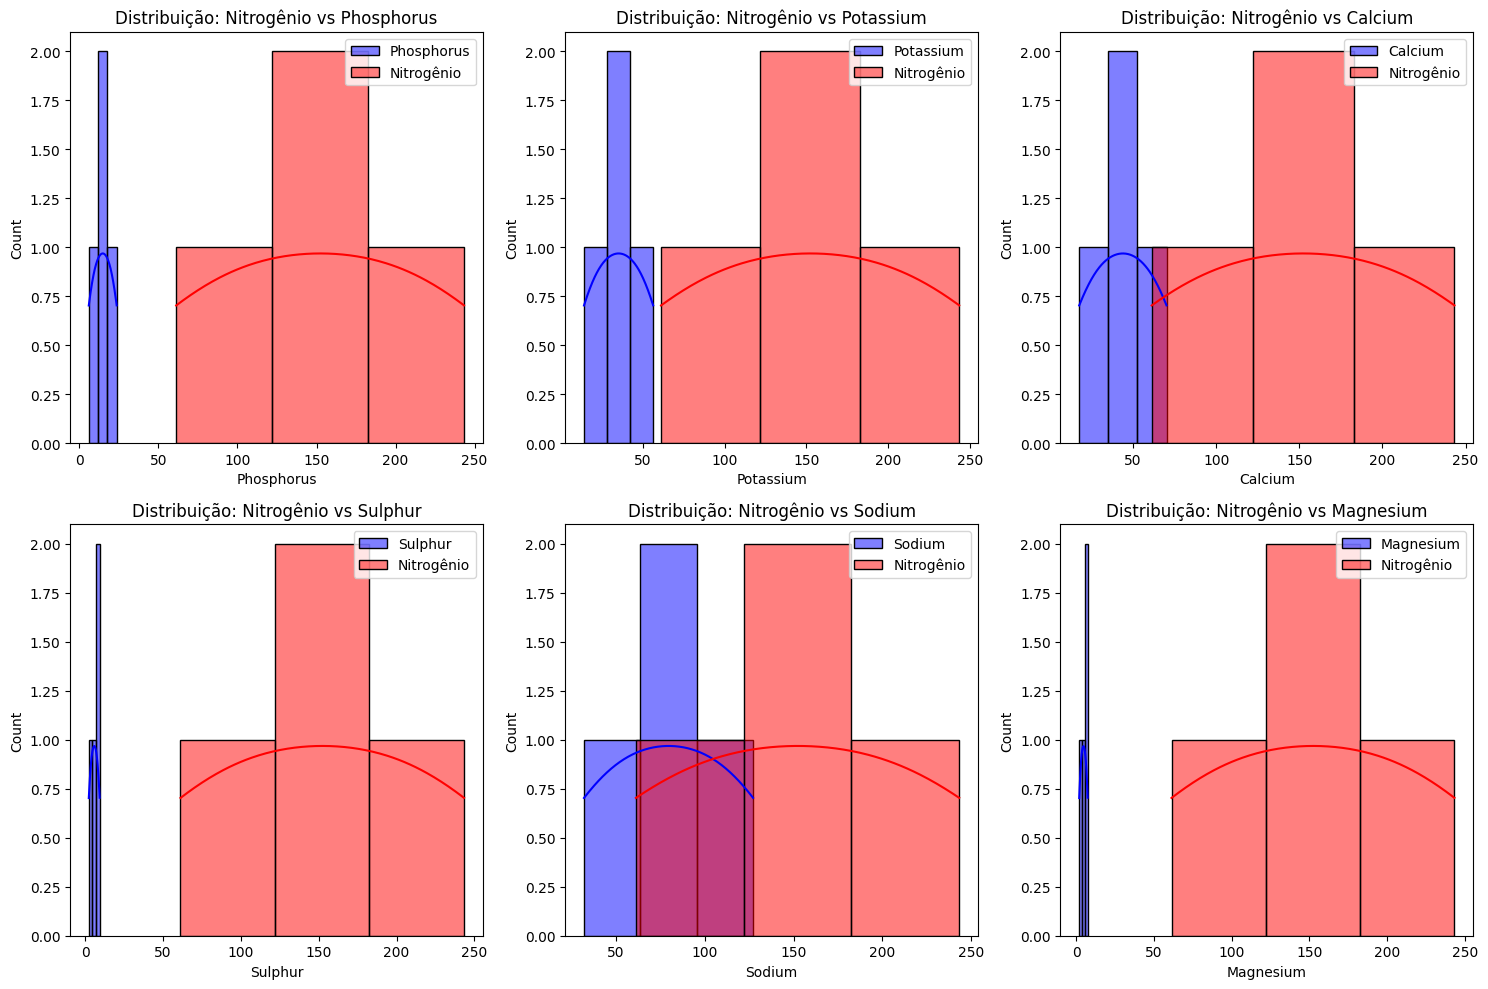

In [17]:
# Definir o tamanho da figura
plt.figure(figsize=(15, 10))

# Criar histogramas para o Nitrogênio e cada elemento
for i, element in enumerate(elements, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[element], kde=True, color='blue', label=element)
    sns.histplot(data['Nitrogen'], kde=True, color='red', label='Nitrogênio')
    plt.title(f'Distribuição: Nitrogênio vs {element}')
    plt.legend()

# Ajustar layout
plt.tight_layout()
plt.show()